In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import warnings


In [2]:
tr = open('train.ft.txt',encoding='UTF-8')
ts = open('test.ft.txt',encoding='UTF-8')

In [3]:
trfl=tr.readlines()
type(trfl)

list

In [4]:
tsfl=ts.readlines()

In [5]:
len(trfl)

3600000

In [6]:
len(tsfl)

400000

In [7]:
trfl[0]

'__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n'

In [8]:
type(trfl)

list

In [9]:
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in trfl]


In [10]:
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in trfl]

In [11]:
#test_sentences

In [12]:
#train_labels

In [13]:
import re

In [14]:
for i in range(len(train_sentences)):
    train_sentences[i] = re.sub('\d','0',train_sentences[i])

In [15]:
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in tsfl]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in tsfl]

In [16]:
for i in range(len(test_sentences)):
    test_sentences[i] = re.sub('\d','0',test_sentences[i])

In [17]:
train = pd.DataFrame({'text':train_sentences})

In [18]:
test = pd.DataFrame({'text':test_sentences})

In [19]:
train['labels'] = train_labels

In [20]:
test['labels'] = test_labels

In [21]:
del trfl
del tsfl

In [22]:
import gc
gc.collect()

160

In [23]:
train = train.sample(frac=1)
test = test.sample(frac=1)

In [24]:
def clean_text(texts):
    texts = texts.replace('\n', ' ')
    if 'www.' in texts or 'http:' in texts or 'https:' in texts or '.com' in texts:
        texts = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "website", texts)
    return texts

In [25]:
train['text'] = train['text'].apply(lambda x: clean_text(x))
test['text'] = test['text'].apply(lambda x: clean_text(x))

In [26]:
train['body_len'] = train['text'].apply(lambda x: len(x) - x.count(" "))
test['body_len'] = test['text'].apply(lambda x: len(x) - x.count(" "))

In [27]:
import string
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [28]:
train['punct%'] = train['text'].apply(lambda x: count_punct(x))
test['punct%'] = test['text'].apply(lambda x: count_punct(x))

In [29]:
train['capitals'] = train['text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))

In [30]:
train['num_unique_words'] = train['text'].apply(lambda comment: len(set(w for w in comment.split())))
test['num_unique_words'] = test['text'].apply(lambda comment: len(set(w for w in comment.split())))

In [31]:
train['words_vs_unique'] = train['num_unique_words'] / train['body_len']
test['words_vs_unique'] = test['num_unique_words'] / test['body_len']

In [32]:
train['num_exclamation_marks'] = train['text'].apply(lambda comment: comment.count('!'))
test['num_exclamation_marks'] = test['text'].apply(lambda comment: comment.count('!'))

In [33]:
train['num_question_marks'] = train['text'].apply(lambda comment: comment.count('?'))
test['num_question_marks'] = test['text'].apply(lambda comment: comment.count('?'))

In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


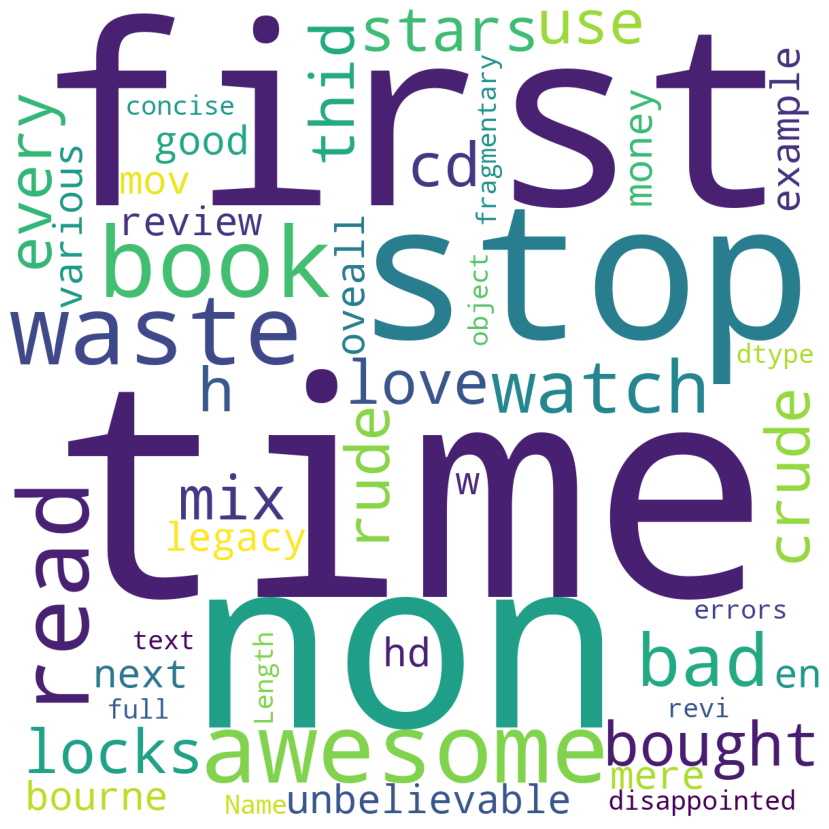

In [35]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 10000, random_state=42).generate(str(train['text']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [36]:
count = 0
for num in train['body_len']:
    count=count+num

In [37]:
count

1274640143

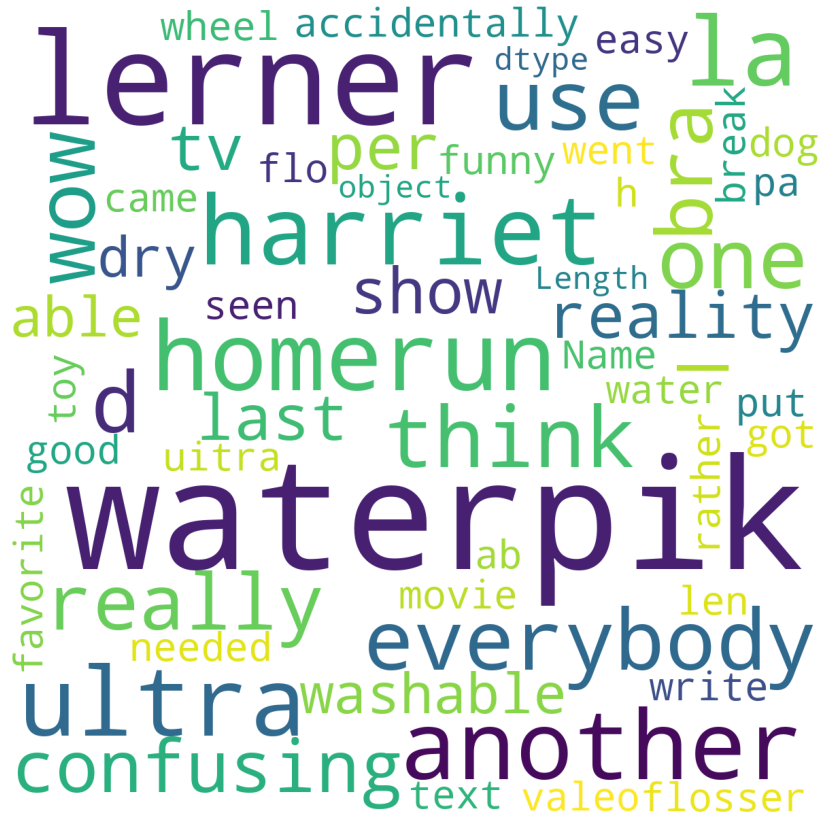

In [38]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 10000, random_state=42).generate(str(test['text']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [39]:
from keras.preprocessing.text import Tokenizer

In [40]:
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(list(train['text']) +list(test['text']))

In [41]:
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

Found 1106211 unique tokens.


In [42]:
print(len(train_sentences))
print(len(test_sentences))

3600000
400000


In [43]:
print(type(train_sentences))
print(type(test_sentences))

<class 'list'>
<class 'list'>


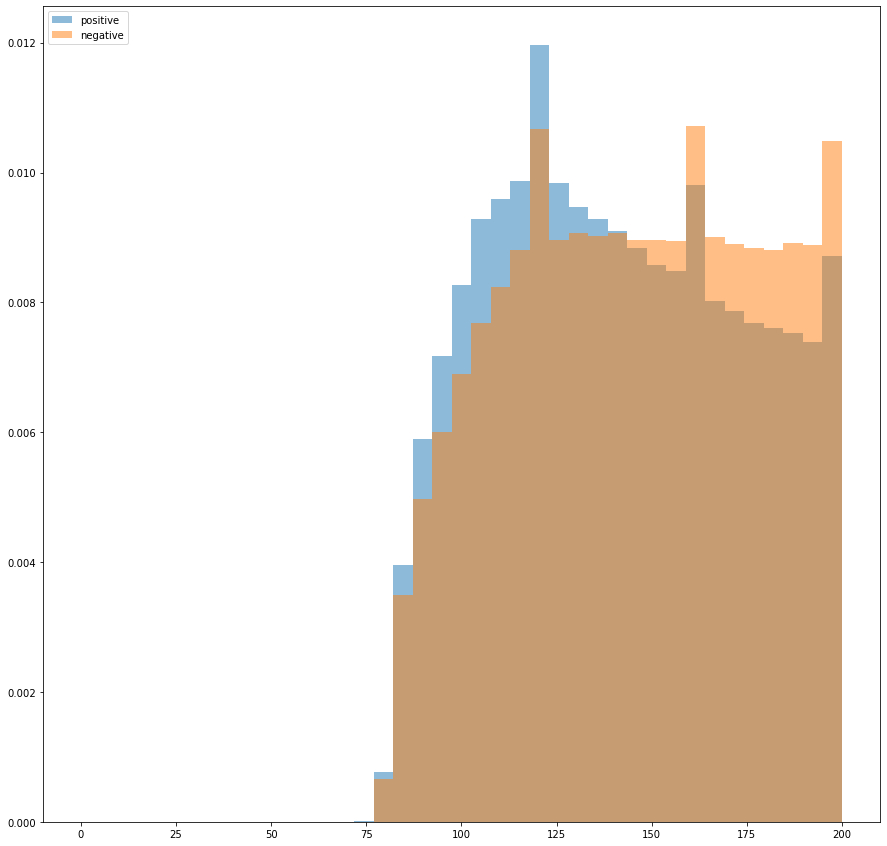

In [44]:
bins = np.linspace(0, 200, 40)
plt.hist(train[train['labels']==1]['body_len'], bins, alpha=0.5, density=True, label='positive')
plt.hist(train[train['labels']==0]['body_len'], bins, alpha=0.5, density=True, label='negative')
plt.legend(loc='upper left')
plt.show()

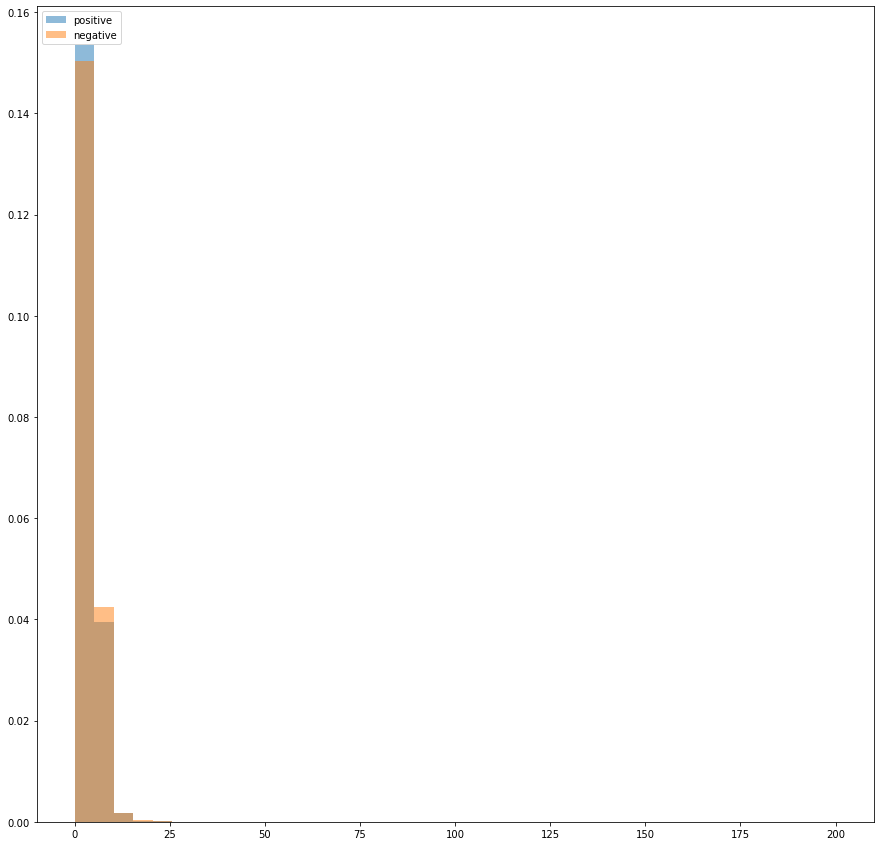

In [45]:
bins = np.linspace(0, 200, 40)
plt.hist(train[train['labels']==1]['punct%'], bins, alpha=0.5, density=True, label='positive')
plt.hist(train[train['labels']==0]['punct%'], bins, alpha=0.5, density=True, label='negative')
plt.legend(loc='upper left')
plt.show()

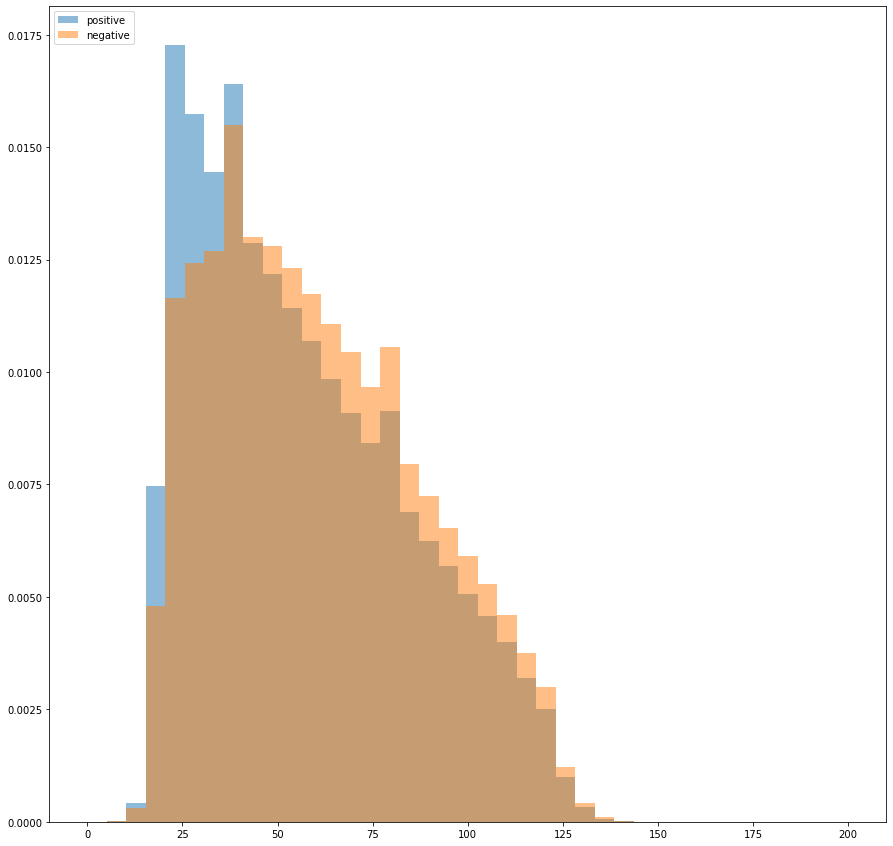

In [46]:
bins = np.linspace(0, 200, 40)
plt.hist(train[train['labels']==1]['num_unique_words'], bins, alpha=0.5, density=True, label='positive')
plt.hist(train[train['labels']==0]['num_unique_words'], bins, alpha=0.5, density=True, label='negative')
plt.legend(loc='upper left')
plt.show()

In [47]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()

In [49]:
def clean_text(lines, review_lines):
    for line in lines:
        tokens = word_tokenize(line)
        #convert to lower case
        tokens = [w.lower() for w in tokens]
        #remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        #remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        #filter out stop words
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]
        words = [wn.lemmatize(w) for w in words]
        review_lines.append(words)
    return review_lines

In [50]:
train_text = train_sentences[:200000]

In [51]:
Train_lines=list()

In [52]:
Train_lines = clean_text(train_text, Train_lines)

In [53]:
pip install paramiko

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install -U gensim

Requirement already up-to-date: gensim in c:\users\asus\anaconda3\lib\site-packages (3.8.3)
Note: you may need to restart the kernel to use updated packages.


In [55]:
import gensim
from gensim import corpora

In [56]:
dictionary = corpora.Dictionary(Train_lines)

In [57]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in Train_lines]

In [58]:
Lda = gensim.models.ldamodel.LdaModel

In [59]:
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=20)

In [60]:
print(ldamodel.print_topics())

[(0, '0.015*"nt" + 0.010*"one" + 0.009*"album" + 0.009*"great" + 0.008*"like" + 0.008*"cd" + 0.008*"good" + 0.007*"song" + 0.007*"would" + 0.007*"get"'), (1, '0.034*"book" + 0.012*"read" + 0.012*"nt" + 0.010*"movie" + 0.010*"one" + 0.007*"like" + 0.007*"story" + 0.007*"time" + 0.006*"good" + 0.006*"great"')]


In [61]:
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=20)

In [62]:
print(ldamodel.print_topics())

[(0, '0.015*"nt" + 0.010*"one" + 0.009*"product" + 0.009*"would" + 0.008*"great" + 0.007*"work" + 0.007*"get" + 0.007*"good" + 0.006*"use" + 0.006*"time"'), (1, '0.051*"book" + 0.017*"read" + 0.010*"nt" + 0.010*"story" + 0.009*"one" + 0.006*"time" + 0.006*"character" + 0.006*"reading" + 0.006*"would" + 0.006*"like"'), (2, '0.017*"movie" + 0.014*"nt" + 0.013*"album" + 0.012*"one" + 0.012*"like" + 0.011*"cd" + 0.010*"song" + 0.009*"good" + 0.009*"great" + 0.007*"music"')]


In [64]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.externals import joblib

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\Asus\anaconda3\lib\site-packages\sklearn\externals\__init__.py)

In [67]:
import pickle

In [68]:
with open('lda_model_topic_3', 'wb') as f:
    pickle.dump(ldamodel,f)

In [69]:
documents= doc_term_matrix[0]

In [70]:
print(documents)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2)]


In [71]:
vector = ldamodel[documents]

In [72]:
vector

[(0, 0.0101126), (2, 0.98029685)]

In [73]:
print(train_text[0])
print(Train_lines[0])

stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^
['stuning', 'even', 'nongamer', 'sound', 'track', 'beautiful', 'paint', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'played', 'game', 'chrono', 'cross', 'game', 'ever', 'played', 'best', 'music', 'back', 'away', 'crude', 'keyboarding', 'take', 'fresher', 'step', 'grate', 'guitar', 'soulful', 'orchestra', 'would', 'impress', 'anyone', 'care', 'listen']


In [74]:
ldamodel = Lda(doc_term_matrix, num_topics=4, id2word = dictionary, passes=30)

In [75]:
print(ldamodel.print_topics())

[(0, '0.027*"album" + 0.023*"cd" + 0.021*"song" + 0.015*"music" + 0.013*"like" + 0.011*"one" + 0.010*"nt" + 0.010*"great" + 0.009*"sound" + 0.008*"best"'), (1, '0.016*"nt" + 0.010*"one" + 0.009*"product" + 0.009*"would" + 0.008*"great" + 0.008*"work" + 0.007*"get" + 0.007*"good" + 0.006*"use" + 0.006*"time"'), (2, '0.026*"movie" + 0.019*"nt" + 0.012*"one" + 0.011*"like" + 0.009*"good" + 0.009*"film" + 0.007*"time" + 0.007*"really" + 0.007*"get" + 0.007*"great"'), (3, '0.057*"book" + 0.019*"read" + 0.009*"story" + 0.009*"one" + 0.008*"nt" + 0.007*"reading" + 0.006*"time" + 0.006*"would" + 0.006*"character" + 0.005*"good"')]


In [77]:
with open('lda_model_topic_4', 'wb') as f:
    pickle.dump(ldamodel,f)

In [76]:
noun_texts=list()

In [78]:
from textblob import TextBlob

In [79]:
def noun_text(lines, review_lines):
    for line in lines:
        k=" ".join(line)
        blob = TextBlob(k)
        words = blob.noun_phrases
        words = list(words)
        words = " ".join(words)
        tokens = word_tokenize(words)
        tokens = [w.lower() for w in tokens]
        review_lines.append(tokens)
    return review_lines

In [80]:
for line in Train_lines:
    print(line)
    break

['stuning', 'even', 'nongamer', 'sound', 'track', 'beautiful', 'paint', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'played', 'game', 'chrono', 'cross', 'game', 'ever', 'played', 'best', 'music', 'back', 'away', 'crude', 'keyboarding', 'take', 'fresher', 'step', 'grate', 'guitar', 'soulful', 'orchestra', 'would', 'impress', 'anyone', 'care', 'listen']


In [81]:
for line in Train_lines:
    k = " ".join(line)
    print(k)
    break

stuning even nongamer sound track beautiful paint senery mind well would recomend even people hate vid game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen


In [83]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [84]:
noun_texts = noun_text(Train_lines, noun_texts)

In [85]:
dictionary = corpora.Dictionary(noun_texts)

In [86]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in noun_texts]

In [87]:
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=20)

In [88]:
print(ldamodel.print_topics())

[(0, '0.047*"book" + 0.016*"nt" + 0.015*"movie" + 0.011*"story" + 0.010*"good" + 0.010*"time" + 0.009*"great" + 0.008*"character" + 0.006*"series" + 0.006*"reading"'), (1, '0.023*"nt" + 0.014*"album" + 0.013*"great" + 0.012*"good" + 0.011*"cd" + 0.011*"song" + 0.009*"music" + 0.008*"product" + 0.008*"work" + 0.007*"time"')]


In [89]:
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=30)

In [90]:
print(ldamodel.print_topics())

[(0, '0.024*"nt" + 0.013*"product" + 0.012*"great" + 0.011*"good" + 0.011*"work" + 0.009*"use" + 0.008*"time" + 0.007*"quality" + 0.007*"price" + 0.006*"amazon"'), (1, '0.049*"book" + 0.015*"nt" + 0.012*"album" + 0.010*"great" + 0.010*"good" + 0.010*"cd" + 0.010*"song" + 0.010*"story" + 0.009*"time" + 0.007*"music"'), (2, '0.043*"movie" + 0.024*"nt" + 0.016*"film" + 0.014*"good" + 0.013*"dvd" + 0.011*"version" + 0.010*"great" + 0.010*"time" + 0.008*"bad" + 0.008*"waste"')]


In [91]:
with open('lda_model_topic_3_2', 'wb') as f:
    pickle.dump(ldamodel,f)

In [92]:
documents= doc_term_matrix[0]

In [93]:
vector = ldamodel[documents]

In [94]:
print(vector)

[(0, 0.019050771), (1, 0.6174078), (2, 0.36354142)]


In [95]:
print(noun_texts[0])
print(train_text[0])

['sound', 'track', 'beautiful', 'paint', 'senery', 'mind', 'vid', 'game', 'music', 'game', 'chrono', 'cross', 'game', 'crude', 'keyboarding', 'fresher', 'step', 'grate', 'guitar', 'soulful', 'orchestra']
stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^


In [96]:
noun_adj_text=list()

In [97]:
def noun_adjective_text(lines, review_lines):
    for line in lines:
        k=str(" ".join(line))
        blob = TextBlob(k)
        sentence = blob.sentences[0]
        tokens=list()
        for word, pos in sentence.tags:
            if pos=='NN' or pos=='JJ':
                tokens.append(word)
        review_lines.append(tokens)
    return review_lines

In [99]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [100]:
noun_adj_text = noun_adjective_text(Train_lines, noun_adj_text)

In [101]:
dictionary = corpora.Dictionary(noun_adj_text)

In [102]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in noun_adj_text]

In [103]:
ldamodel = Lda(doc_term_matrix, num_topics=4, id2word = dictionary, passes=40)

In [104]:
with open('lda_model_topic_4_2_passes_40', 'wb') as f:
    pickle.dump(ldamodel,f)

In [105]:
print(ldamodel.print_topics())

[(0, '0.054*"movie" + 0.019*"film" + 0.014*"good" + 0.014*"dvd" + 0.013*"nt" + 0.012*"great" + 0.012*"time" + 0.010*"bad" + 0.009*"game" + 0.009*"watch"'), (1, '0.015*"product" + 0.013*"great" + 0.012*"nt" + 0.011*"work" + 0.011*"good" + 0.009*"time" + 0.008*"use" + 0.007*"year" + 0.007*"price" + 0.007*"quality"'), (2, '0.080*"book" + 0.014*"story" + 0.012*"read" + 0.010*"time" + 0.009*"character" + 0.009*"good" + 0.008*"great" + 0.007*"nt" + 0.007*"series" + 0.007*"life"'), (3, '0.030*"cd" + 0.030*"album" + 0.026*"song" + 0.020*"music" + 0.015*"great" + 0.013*"good" + 0.011*"sound" + 0.009*"fan" + 0.008*"track" + 0.008*"nt"')]


In [106]:
ldamodel = Lda(doc_term_matrix, num_topics=4, id2word = dictionary, passes=50)

In [107]:
with open('lda_model_topic_4_2_passes_50', 'wb') as f:
    pickle.dump(ldamodel,f)

In [108]:
print(ldamodel.print_topics())

[(0, '0.077*"book" + 0.024*"movie" + 0.016*"story" + 0.013*"time" + 0.012*"good" + 0.012*"read" + 0.011*"nt" + 0.010*"character" + 0.010*"great" + 0.009*"series"'), (1, '0.015*"product" + 0.014*"great" + 0.013*"nt" + 0.012*"good" + 0.011*"work" + 0.010*"time" + 0.009*"use" + 0.008*"year" + 0.007*"price" + 0.006*"month"'), (2, '0.021*"cd" + 0.021*"album" + 0.018*"song" + 0.014*"music" + 0.013*"great" + 0.012*"good" + 0.007*"time" + 0.007*"nt" + 0.007*"sound" + 0.006*"fan"'), (3, '0.030*"dvd" + 0.026*"version" + 0.016*"video" + 0.016*"quality" + 0.012*"original" + 0.010*"edition" + 0.010*"bad" + 0.010*"dog" + 0.009*"tv" + 0.009*"watch"')]


In [109]:
documents= doc_term_matrix[0]

In [110]:
vector = ldamodel[documents]

In [111]:
print(vector)

[(0, 0.08338441), (1, 0.27155593), (2, 0.533924), (3, 0.11113566)]


In [112]:
print(noun_adj_text[0])
print(train_text[0])

['sound', 'track', 'beautiful', 'paint', 'senery', 'mind', 'vid', 'game', 'music', 'game', 'chrono', 'cross', 'game', 'music', 'crude', 'fresher', 'step', 'grate', 'guitar', 'soulful', 'orchestra', 'anyone', 'care']
stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^
